## Data modeling exercise

In [33]:
import os,re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.metrics import classification_report,confusion_matrix,log_loss
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

pd.set_option('display.max_columns',200)
pd.set_option("display.max_rows",525)

In [34]:
dfTrain = pd.read_csv("exercise_40_train.csv")
dfTest = pd.read_csv("exercise_40_test.csv")


In [35]:
dfTrain.head(1)

,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,x50,x51,x52,x53,x54,x55,x56,x57,x58,x59,x60,x61,x62,x63,x64,x65,x66,x67,x68,x69,x70,x71,x72,x73,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83,x84,x85,x86,x87,x88,x89,x90,x91,x92,x93,x94,x95,x96,x97,x98,x99,x100
0,0,0.165254,18.060003,Wed,1.07738,-1.339233,-1.584341,0.0062%,0.220784,1.816481,1.171788,109.626841,4.644568,4.814885,1.54174,-0.587361,101.906052,4.278444,77.7097,$-908.650758424405,7.328029,36.601967,126.384294,1.264713,female,3.834082,2.352406,905.491445,14.779467,0.752524,NaN,no,-0.597288,Colorado,46.667221,3.159002,69.444841,32.450076,NaN,5-10 miles,18.129499,NaN,0.904626,1.227266,0.703326,-0.810371,0.234654,53.359113,58.2517,16.084987,1602.756464,2.740134,7.617666,72.167186,0.166127,NaN,-1.532562,NaN,300.62999,0,August,9.840873,6.600008,1.252479,46.992716,farmers,1.212048,12.896733,15.263491,0.518653,0.543768,-0.912506,53.521544,7.723719,NaN,NaN,NaN,mercedes,51.287604,1.0,11.131462,-0.471594,-3.261865,0.08571,0.383351,126.935322,47.872599,-0.162668,1.079562,10.602395,2.770844,-0.397427,0.909479,no,5.492487,NaN,10.255579,7.62773,0,yes,104.251338


In [36]:
dfTest.head(1)

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,x50,x51,x52,x53,x54,x55,x56,x57,x58,x59,x60,x61,x62,x63,x64,x65,x66,x67,x68,x69,x70,x71,x72,x73,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83,x84,x85,x86,x87,x88,x89,x90,x91,x92,x93,x94,x95,x96,x97,x98,x99,x100
0,4.747627,20.509439,Wednesday,2.299105,-1.815777,-0.752166,0.0098%,-3.240309,0.587948,-0.260721,101.113628,-0.812035,3.251085,-0.004432,-0.917763,102.193597,7.097387,75.256714,$120.216189955777,8.269754,4.794438,56.134458,-0.083641,NaN,5.740955,-3.15254,924.013304,17.697125,1.402273,NaN,no,1.461654,Florida,57.930285,4.7273,66.416594,28.450466,33.49931,5-10 miles,16.776061,99971.844703,0.492812,-0.963616,NaN,NaN,1.266416,53.020326,61.840284,NaN,1825.413159,2.517924,NaN,70.880778,NaN,1.923125,0.239009,NaN,300.62999,0,May,5.461123,5.149473,1.179229,59.346822,progressive,2.219502,17.667792,5.557066,-2.030901,0.636111,-0.000234,62.363381,4.613878,2.415655,3.632041,-0.382482,mercedes,55.938387,1.0,8.325299,-1.274085,-5.663245,2.40266,-0.06104,NaN,64.0025,0.548974,3.420875,11.553023,5.904644,NaN,12.542333,no,3.107683,0.533904,12.438759,7.298306,0,NaN,93.56712


In [37]:
for i in dfTest.columns.tolist():
    if (i == "y"):
        print("true")

## Merge data

In [38]:
dfCombine = pd.concat([dfTrain,dfTest])
dfCombine.iloc[40000:40001,]


,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,x50,x51,x52,x53,x54,x55,x56,x57,x58,x59,x60,x61,x62,x63,x64,x65,x66,x67,x68,x69,x70,x71,x72,x73,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83,x84,x85,x86,x87,x88,x89,x90,x91,x92,x93,x94,x95,x96,x97,x98,x99,x100
0,NaN,4.747627,20.509439,Wednesday,2.299105,-1.815777,-0.752166,0.0098%,-3.240309,0.587948,-0.260721,101.113628,-0.812035,3.251085,-0.004432,-0.917763,102.193597,7.097387,75.256714,$120.216189955777,8.269754,4.794438,56.134458,-0.083641,NaN,5.740955,-3.15254,924.013304,17.697125,1.402273,NaN,no,1.461654,Florida,57.930285,4.7273,66.416594,28.450466,33.49931,5-10 miles,16.776061,99971.844703,0.492812,-0.963616,NaN,NaN,1.266416,53.020326,61.840284,NaN,1825.413159,2.517924,NaN,70.880778,NaN,1.923125,0.239009,NaN,300.62999,0,May,5.461123,5.149473,1.179229,59.346822,progressive,2.219502,17.667792,5.557066,-2.030901,0.636111,-0.000234,62.363381,4.613878,2.415655,3.632041,-0.382482,mercedes,55.938387,1.0,8.325299,-1.274085,-5.663245,2.40266,-0.06104,NaN,64.0025,0.548974,3.420875,11.553023,5.904644,NaN,12.542333,no,3.107683,0.533904,12.438759,7.298306,0,NaN,93.56712


In [39]:
dfCombine.reset_index(drop=True,inplace=True)

## Drop x19

In [40]:
dfCombine.drop(["x19"],axis=1,inplace=True)

In [41]:
dfCombine.tail(15)

,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,x50,x51,x52,x53,x54,x55,x56,x57,x58,x59,x60,x61,x62,x63,x64,x65,x66,x67,x68,x69,x70,x71,x72,x73,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83,x84,x85,x86,x87,x88,x89,x90,x91,x92,x93,x94,x95,x96,x97,x98,x99,x100
49985,NaN,-0.736014,20.521246,Mon,-1.063750,0.026207,1.213590,-0.0147%,1.259334,3.772195,0.027704,NaN,1.676515,5.121585,NaN,-0.938329,NaN,9.051384,75.721721,0.490527,1.169093,57.398798,-0.146897,female,7.059847,1.319189,1106.036434,13.169400,0.953751,NaN,yes,0.573764,Oregon,53.539255,-0.822446,73.705643,25.750056,NaN,5-10 miles,10.067769,98726.755725,2.669192,2.947775,NaN,0.441242,-1.128505,52.121453,62.488409,NaN,1631.531367,3.632953,NaN,66.526842,-0.060789,1.457902,-0.385146,26.684241,300.629990,1,June,NaN,2.742502,-0.030588,50.850863,esurance,-0.877116,14.402071,NaN,0.824507,1.062483,-0.000234,50.965109,4.927721,1.474674,-0.582461,0.620936,NaN,NaN,1.0,13.007662,1.100808,-4.433106,2.493231,2.138771,103.862650,48.523133,-2.505763,0.497260,NaN,1.512272,0.747831,-0.425794,no,0.959616,0.354410,9.987922,10.878594,0,yes,97.811463
49986,NaN,3.712521,19.165130,Sunday,1.830575,0.453073,-1.032832,0.0033%,0.028534,2.666954,0.917458,102.242967,6.576326,6.532160,0.602609,1.340312,99.463272,9.779164,71.647983,4.728445,13.650722,33.534932,-0.679683,male,6.992263,1.341141,946.456346,19.416014,3.081420,-0.118341,no,0.522947,California,51.070986,1.629298,67.913747,27.362753,18.876847,5-10 miles,10.450876,98364.762399,-1.103506,1.864032,NaN,-0.376934,1.553511,43.217426,58.747941,8.105483,2067.160150,0.757456,NaN,69.331921,0.523956,0.439878,0.151020,NaN,363.160054,0,July,10.288280,3.243170,NaN,53.454268,allstate,1.207612,14.402071,20.722122,-1.663337,0.937230,-0.000234,46.493147,6.659511,-0.166853,-0.107964,NaN,buick,44.252793,1.0,13.685365,0.795794,-5.596558,2.551467,2.138771,NaN,53.800101,-1.463127,0.257929,10.024261,5.191872,0.130769,6.536151,no,5.920077,2.766128,8.730658,10.663369,0,NaN,95.004361
49987,NaN,0.709832,16.587671,Sat,-1.800409,-1.028227,1.118936,-0.0066%,1.101568,4.337200,0.801664,104.898301,0.750542,4.082391,NaN,1.164066,99.298691,11.030309,75.748940,4.399880,0.029930,90.708540,1.751903,male,7.113489,-2.448262,1048.539708,14.207746,-2.467190,NaN,no,0.640640,South Carolina,52.978748,2.124352,69.740660,35.805583,29.242704,5-10 miles,11.712159,99309.392489,NaN,-0.328943,NaN,1.697430,0.226162,50.518948,65.373842,NaN,3129.347342,0.439898,13.811304,62.123992,-1.056065,NaN,0.831958,NaN,300.629990,0,December,7.456765,5.465142,NaN,54.951326,esurance,-0.723682,14.402071,21.846048,0.760048,1.238322,-0.000234,52.768163,14.128794,0.606747,2.399640,-2.063285,ford,46.921408,1.0,9.159948,-1.574925,-6.321939,2.341064,2.138771,106.578659,45.932345,0.698349,-1.080365,NaN,3.225801,-0.022385,6.514797,no,4.090027,NaN,10.494749,9.508210,1,yes,106.657515
49988,NaN,2.334473,21.244453,Sun,-0.723619,-0.875640,-1.765345,0.0115%,0.892667,2.059836,0.377693,93.963936,0.461947,3.426426,NaN,-0.009906,100.784775,9.188568,72.209640,1.582737,4.426977,40.325717,0.848079,NaN,1.928928,0.645825,1074.744838,17.416748,5.167677,NaN,no,4.238717,NaN,54.379896,0.481625,70.707886,25.567279,84.847037,5-10 miles,11.871436,NaN,0.781929,0.466086,0.766055,0.018412,0.466561,49.440586,70.257386,NaN,3284.701611,-1.468251,5.534820,62.707036,NaN,4.146522,0.253623,NaN,300.629990,0,January,4.698075,3.382028,1.776860,59.306625,allstate,0.024762,14.402071,23.061928,0.146350,1.625178,-0.000234,54.300211,4.479601,NaN,3.038046,-0.109401,ford,49.978955,1.0,8.752467,-0.447530,-6.405434,1.052414,2.138771,98.724511,53.189115,0.505254,0.110240,11.175302,2.400006,0.932031,1.818764,no,3.267682,-0.266084,8.320911,9.146805,0,NaN,102.901152
49989,NaN,0.246916,18.310140,Wed,1.690758,0.423054,-1.224011,-0.0147%,2.022091,2.944178,-0.443466,106.680671,7.147041,2.456863,1.476762,1.179419,NaN,3.499519,87.579403,5.408309,0.

In [42]:
dfCombine["x3"].unique()

array(['Wed', 'Friday', 'Thursday', 'Tuesday', 'Sunday', 'Saturday',
       'Sat', 'Wednesday', 'Sun', 'Tue', 'Thur', 'Monday', 'Fri', 'Mon'],
      dtype=object)

In [43]:
dfCombine["x24"].unique()

array(['female', 'male', nan], dtype=object)

In [44]:
dfCombine["x31"].unique()

array(['no', 'yes'], dtype=object)

In [45]:
dfCombine["x33"].unique()

array(['Colorado', 'Tennessee', 'Texas', 'Minnesota', 'New York',
       'Florida', 'Nebraska', 'California', nan, 'North Dakota',
       'Arizona', 'Alabama', 'Ohio', 'Pennsylvania', 'Iowa', 'Indiana',
       'Vermont', 'Arkansas', 'Massachusetts', 'Illinois', 'Georgia',
       'West Virginia', 'Connecticut', 'Virginia', 'North Carolina',
       'Montana', 'New Mexico', 'New Hampshire', 'Michigan', 'DC',
       'Washington', 'Louisiana', 'Kentucky', 'Utah', 'Missouri',
       'Oregon', 'Oklahoma', 'Nevada', 'Wisconsin', 'New Jersey',
       'Maryland', 'Maine', 'Alaska', 'Idaho', 'Wyoming', 'Rhode Island',
       'South Dakota', 'Mississippi', 'Kansas', 'Delaware', 'Hawaii',
       'South Carolina'], dtype=object)

In [46]:
dfCombine["x39"].unique()

array(['5-10 miles'], dtype=object)

In [47]:
dfCombine["x65"].unique()

array(['farmers', 'allstate', 'geico', 'progressive', 'esurance'],
      dtype=object)

In [48]:
dfCombine["x77"].unique()

array(['mercedes', 'subaru', 'nissan', 'toyota', nan, 'chevrolet',
       'buick', 'ford'], dtype=object)

In [49]:
dfCombine["x93"].unique()

array(['no', 'yes'], dtype=object)

In [50]:
dfCombine["x99"].unique()

array(['yes', nan], dtype=object)

In [51]:
dfCombine["y"].unique()

array([ 0.,  1., nan])

In [52]:
features = [
    'x1',
    # 'x2',
    # 'x3',
    # 'x4',
 'x5',
    # 'x6',
 'x7',
 'x8',
 'x9',
 'x10',
    # 'x11',
    'x12',
 'x13',
    # 'x14',
 'x15',
    # 'x16',
 'x17',
 'x18',
    # 'x19',
 'x20',
 'x21',
 'x22',
 'x23',
    # 'x24',
 'x25',
 'x26',
 'x27',
 'x28',
 'x29',
    # 'x30',
    # 'x31',
 'x32',
    # 'x33',
 'x34',
 'x35',
 'x36',
 'x37',
 'x38',
    # 'x39',
 'x40',
    # 'x41',
    # 'x42',
    # 'x43',
    # 'x44',
    # 'x45',
 'x46',
 'x47',
    # 'x48',
    # 'x49',
 'x50',
 'x51',
    # 'x52',
    # 'x53',
    # 'x54',
    # 'x55',
    'x56',
    # 'x57',
    # 'x58',
    'x59',
    # "x60",
 #'x61',
 'x62',
 'x63',
 #'x64',
    # "x65",
 'x66',
 'x67',
 'x68',
 'x69',
 'x70',
 'x71',
 'x72',
 'x73',
 #'x74',
 #'x75',
 #'x76',
    # "x77",
 #'x78',
 'x79',
 #'x80',
 'x81',
 'x82',
 'x83',
 'x84',
 # 'x85',
 'x86',
 'x87',
 'x88',
 # 'x89',
 'x90',
 # 'x91',
 'x92',
    # "x93",
 'x94',
    # 'x95',
    # 'x96',
 'x97',
 'x98',
    # 'x99',
 'x100',
 'encode_gender_x24',
 'encode_x31',
 'encode_x93',
 'cat_days_x3_Friday',
 'cat_days_x3_Monday',
 'cat_days_x3_Saturday',
 'cat_days_x3_Sunday',
 'cat_days_x3_Thursday',
 'cat_days_x3_Tuesday',
 'cat_days_x3_Wednesday',
 'cat_insurance_x65_allstate',
 'cat_insurance_x65_esurance',
 'cat_insurance_x65_farmers',
 'cat_insurance_x65_geico',
 'cat_insurance_x65_progressive',
 'cat_state_x33_Alabama',
 'cat_state_x33_Alaska',
 'cat_state_x33_Arizona',
 'cat_state_x33_Arkansas',
 'cat_state_x33_California',
 'cat_state_x33_Colorado',
 'cat_state_x33_Connecticut',
 'cat_state_x33_DC',
 'cat_state_x33_Delaware',
 'cat_state_x33_Florida',
 'cat_state_x33_Georgia',
 'cat_state_x33_Hawaii',
 'cat_state_x33_Idaho',
 'cat_state_x33_Illinois',
 'cat_state_x33_Indiana',
 'cat_state_x33_Iowa',
 'cat_state_x33_Kansas',
 'cat_state_x33_Kentucky',
 'cat_state_x33_Louisiana',
 'cat_state_x33_Maine',
 'cat_state_x33_Maryland',
 'cat_state_x33_Massachusetts',
 'cat_state_x33_Michigan',
 'cat_state_x33_Minnesota',
 'cat_state_x33_Mississippi',
 'cat_state_x33_Missouri',
 'cat_state_x33_Montana',
 'cat_state_x33_Nebraska',
 'cat_state_x33_Nevada',
 'cat_state_x33_New Hampshire',
 'cat_state_x33_New Jersey',
 'cat_state_x33_New Mexico',
 'cat_state_x33_New York',
 'cat_state_x33_North Carolina',
 'cat_state_x33_North Dakota',
 'cat_state_x33_Ohio',
 'cat_state_x33_Oklahoma',
 'cat_state_x33_Oregon',
 'cat_state_x33_Pennsylvania',
 'cat_state_x33_Rhode Island',
 'cat_state_x33_South Carolina',
 'cat_state_x33_South Dakota',
 'cat_state_x33_Tennessee',
 'cat_state_x33_Texas',
 'cat_state_x33_Utah',
 'cat_state_x33_Vermont',
 'cat_state_x33_Virginia',
 'cat_state_x33_Washington',
 'cat_state_x33_West Virginia',
 'cat_state_x33_Wisconsin',
 'cat_state_x33_Wyoming',
 'cat_car_manufacturer_x77_buick',
 'cat_car_manufacturer_x77_chevrolet',
 'cat_car_manufacturer_x77_ford',
 'cat_car_manufacturer_x77_mercedes',
 'cat_car_manufacturer_x77_nissan',
 'cat_car_manufacturer_x77_subaru',
 'cat_car_manufacturer_x77_toyota']

## Restrict data set

In [54]:
# used to check data
dfFilter = dfCombine[(dfCombine["x5"].isnull() == False)]
dfFilter = dfFilter[(dfFilter["x26"].isnull() == False)]
dfFilter = dfFilter[(dfFilter["x63"].isnull() == False)]
dfFilter = dfFilter[(dfFilter["x22"].isnull() == False)]
dfFilter = dfFilter[(dfFilter["x38"].isnull() == False)]
dfFilter = dfFilter[(dfFilter["x67"].isnull() == False)]
dfFilter = dfFilter[(dfFilter["x68"].isnull() == False)]
dfFilter = dfFilter[(dfFilter["x79"].isnull() == False)]
dfFilter = dfFilter[(dfFilter["x83"].isnull() == False)]
dfFilter = dfFilter[(dfFilter["x86"].isnull() == False)]
dfFilter = dfFilter[(dfFilter["x88"].isnull() == False)]
dfFilter = dfFilter[(dfFilter["x92"].isnull() == False)]
dfFilter = dfFilter[(dfFilter["x94"].isnull() == False)]
dfFilter = dfFilter[(dfFilter["x24"].isnull() == False)]
dfFilter = dfFilter[(dfFilter["x77"].isnull() == False)]


In [55]:
# dfFilterTrain = dfCombine[(dfCombine["y"].isnull() == False)]
dfFilterTrain = dfTrain[(dfTrain["x5"].isnull() == False)]
dfFilterTrain = dfFilterTrain[(dfFilterTrain["x26"].isnull() == False)]
dfFilterTrain = dfFilterTrain[(dfFilterTrain["x33"].isnull() == False)]
dfFilterTrain = dfFilterTrain[(dfFilterTrain["x63"].isnull() == False)]
dfFilterTrain = dfFilterTrain[(dfFilterTrain["x22"].isnull() == False)]
dfFilterTrain = dfFilterTrain[(dfFilterTrain["x38"].isnull() == False)]
dfFilterTrain = dfFilterTrain[(dfFilterTrain["x67"].isnull() == False)]
dfFilterTrain = dfFilterTrain[(dfFilterTrain["x68"].isnull() == False)]
dfFilterTrain = dfFilterTrain[(dfFilterTrain["x79"].isnull() == False)]
dfFilterTrain = dfFilterTrain[(dfFilterTrain["x83"].isnull() == False)]
dfFilterTrain = dfFilterTrain[(dfFilterTrain["x86"].isnull() == False)]
dfFilterTrain = dfFilterTrain[(dfFilterTrain["x88"].isnull() == False)]
dfFilterTrain = dfFilterTrain[(dfFilterTrain["x92"].isnull() == False)]
dfFilterTrain = dfFilterTrain[(dfFilterTrain["x94"].isnull() == False)]
dfFilterTrain = dfFilterTrain[(dfFilterTrain["x24"].isnull() == False)]
dfFilterTrain = dfFilterTrain[(dfFilterTrain["x77"].isnull() == False)]


In [56]:
dfFilterTest = dfTest[(dfTest["x5"].isnull() == False)]
dfFilterTest = dfFilterTest[(dfFilterTest["x26"].isnull() == False)]
dfFilterTest = dfFilterTest[(dfFilterTest["x33"].isnull() == False)]
dfFilterTest = dfFilterTest[(dfFilterTest["x63"].isnull() == False)]
dfFilterTest = dfFilterTest[(dfFilterTest["x22"].isnull() == False)]
dfFilterTest = dfFilterTest[(dfFilterTest["x38"].isnull() == False)]
dfFilterTest = dfFilterTest[(dfFilterTest["x67"].isnull() == False)]
dfFilterTest = dfFilterTest[(dfFilterTest["x68"].isnull() == False)]
dfFilterTest = dfFilterTest[(dfFilterTest["x79"].isnull() == False)]
dfFilterTest = dfFilterTest[(dfFilterTest["x83"].isnull() == False)]
dfFilterTest = dfFilterTest[(dfFilterTest["x86"].isnull() == False)]
dfFilterTest = dfFilterTest[(dfFilterTest["x88"].isnull() == False)]
dfFilterTest = dfFilterTest[(dfFilterTest["x92"].isnull() == False)]
dfFilterTest = dfFilterTest[(dfFilterTest["x94"].isnull() == False)]
dfFilterTest = dfFilterTest[(dfFilterTest["x24"].isnull() == False)]
dfFilterTest = dfFilterTest[(dfFilterTest["x77"].isnull() == False)]


In [57]:
print(len(dfCombine))
print(len(dfFilter))
print(len(dfFilterTrain))
print(len(dfFilterTest))

50000
15585
10307
2556


In [58]:
dfFilter.isnull().sum()

y        3101
x1          0
x2          0
x3          0
x4          0
x5          0
x6          0
x7          0
x8          0
x9          0
x10         0
x11      1996
x12         0
x13         0
x14      3754
x15         0
x16      4393
x17         0
x18         0
x20         0
x21         0
x22         0
x23         0
x24         0
x25         0
x26         0
x27         0
x28         0
x29         0
x30     12621
x31         0
x32         0
x33      2722
x34         0
x35         0
x36         0
x37         0
x38         0
x39         0
x40         0
x41      3716
x42      3693
x43         0
x44     13347
x45      3131
x46         0
x47         0
x48         0
x49      4992
x50         0
x51         0
x52      6365
x53         0
x54      4882
x55      6927
x56         0
x57     12657
x58         0
x59         0
x60         0
x61      2852
x62         0
x63         0
x64      1991
x65         0
x66         0
x67         0
x68         0
x69         0
x70         0
x71         0
x72   

In [59]:
dfFilter.head(15)

,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,x50,x51,x52,x53,x54,x55,x56,x57,x58,x59,x60,x61,x62,x63,x64,x65,x66,x67,x68,x69,x70,x71,x72,x73,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83,x84,x85,x86,x87,x88,x89,x90,x91,x92,x93,x94,x95,x96,x97,x98,x99,x100
2,1.0,4.427278,19.188092,Thursday,0.145652,0.366093,0.709962,-8e-04%,0.952323,0.782974,-1.247022,95.375221,1.098525,1.216059,0.450624,0.211685,99.215210,8.601193,75.922820,3.802395,7.407996,71.022413,0.070968,male,4.332644,-0.375737,1077.233497,13.177479,4.174536,NaN,no,2.605279,Texas,56.674425,0.108486,69.798923,30.684074,31.049447,5-10 miles,14.372443,100087.339539,0.869508,0.150728,NaN,-0.856591,-2.561083,50.236892,63.975108,6.998154,3756.910196,1.772648,15.057485,59.428690,1.844493,NaN,4.127857,NaN,182.369349,0,September,6.228138,1.370661,-0.239705,54.120933,geico,-0.032980,14.402071,18.211817,-0.819798,1.010811,-0.000234,48.202036,9.336021,0.209817,1.124866,-3.558718,subaru,55.020333,1.0,5.660882,-2.608974,-6.387984,2.506272,2.138771,NaN,53.977291,0.657292,-0.353469,NaN,3.997183,2.059615,0.305170,no,4.456565,NaN,8.754572,7.810979,0,yes,109.345215
3,0.0,3.925235,19.901257,Tuesday,1.763602,-0.251926,-0.827461,-0.0057%,-0.520756,1.825586,2.223038,96.420382,-1.390239,3.962961,NaN,-2.046856,NaN,6.611554,74.966925,7.728963,8.136213,121.610846,0.700954,male,7.294990,-0.603983,1051.655489,17.006528,2.347355,NaN,no,1.071202,Minnesota,59.154933,1.319711,65.408246,34.401290,48.363690,5-10 miles,13.191173,100934.096543,NaN,-0.965711,NaN,0.422522,-2.123048,41.857197,59.226119,NaN,1961.609788,3.155214,NaN,68.671023,-1.020225,5.833712,0.663759,NaN,300.629990,0,September,6.005140,0.013162,0.318335,54.784192,geico,-0.466535,14.402071,14.629914,1.389325,0.704880,-1.510949,49.882647,5.661421,1.606797,1.726010,-0.398417,nissan,47.769343,1.0,7.472328,1.424316,-5.431998,3.285291,2.138771,105.208424,49.543472,2.066346,1.761266,NaN,2.933707,0.899392,5.971782,no,4.100022,1.151085,NaN,9.178325,1,yes,103.021970
4,0.0,2.868802,22.202473,Sunday,3.405119,0.083162,1.381504,0.0109%,-0.732739,2.151990,-0.275406,90.769952,7.230125,3.877312,0.392002,-1.201565,100.626558,9.103015,77.977156,2.272765,24.452102,56.492317,-1.102387,male,6.313827,0.429187,949.904947,16.962710,0.510985,NaN,yes,2.283921,New York,46.445617,0.022747,66.662910,31.135261,31.819899,5-10 miles,17.210430,NaN,NaN,1.012093,NaN,-0.348240,3.477451,47.844153,55.921988,NaN,2345.195505,3.253079,14.193721,71.853326,0.926779,4.115990,-2.273628,NaN,149.725023,0,January,7.654926,1.305936,0.418272,51.486405,geico,-0.195764,14.402071,12.227512,-2.951163,1.096548,-0.000234,51.349106,9.422401,3.488398,1.884259,0.019803,toyota,44.640410,1.0,6.530625,0.705003,-5.664815,3.395916,2.138771,96.150945,54.843346,0.663113,-0.952377,NaN,2.922302,3.003595,1.046096,yes,3.234033,2.074927,9.987006,11.702664,0,yes,92.925935
9,0.0,1.016857,21.440000,Tuesday,-2.619848,0.637245,1.357868,0.0091%,1.471836,0.811922,-0.699837,99.525915,2.893282,1.603635,NaN,-3.283478,NaN,7.988783,89.462640,4.055610,-0.328695,24.882245,-0.102272,male,2.166865,-0.795430,1244.523235,9.513302,0.273440,NaN,no,0.007047,NaN,54.888113,-0.659695,74.819910,27.163550,22.122351,5-10 miles,12.427456,NaN,1.900549,-0.309440,1.488359,1.588902,-2.353063,51.452701,63.315909,7.618690,2472.746697,0.212489,NaN,73.785027,0.765128,7.007051,-0.491617,NaN,300.629990,0,December,13.208870,2.272143,-0.176584,34.303682,esurance,1.897076,14.402071,26.982896,1.313928,1.086069,-0.000234,51.509061,2.108304,NaN,2.006943,1.694711,chevrolet,NaN,1.0,6.620670,-1.261619,-8.521096,1.489725,2.138771,87.237941,50.673805,-0.815168,0.973880,6.990532,2.398882,NaN,7.427018,no,2.794465,0.219889,10.211048,10.970247,0,NaN,97.814997
13,0.0,3.671553,22.207880,Tue,0.698724,-1.862047,2.153832,0.0068%,0.205453,1.309530,0.683070,111.472466,1.433037,2.625811,0.313683,-0.824623,102.816034,6.134170,72.430917,7.074

## Map days, gender, x31, & x93

In [60]:
# dfFilter["x3"] = dfFilter["x3"].map({"Mon":"Monday","Tue":"Tuesday","Wed":"Wednesday", \
#     "Thur":"Thursday","Fri":"Friday",'Sat':'Saturday','Sun':'Sunday'})

dfFilter["map_days_x3"] = dfFilter["x3"].replace({"Mon":"Monday","Tue":"Tuesday","Wed":"Wednesday", \
    "Thur":"Thursday","Fri":"Friday",'Sat':'Saturday','Sun':'Sunday'})
dfFilterTrain["map_days_x3"] = dfFilterTrain["x3"].replace({"Mon":"Monday","Tue":"Tuesday","Wed":"Wednesday", \
    "Thur":"Thursday","Fri":"Friday",'Sat':'Saturday','Sun':'Sunday'})
dfFilterTest["map_days_x3"] = dfFilterTest["x3"].replace({"Mon":"Monday","Tue":"Tuesday","Wed":"Wednesday", \
    "Thur":"Thursday","Fri":"Friday",'Sat':'Saturday','Sun':'Sunday'})

In [61]:
dfFilter["encode_gender_x24"] = dfFilter["x24"].map({"male":0,"female":1})
dfFilterTrain["encode_gender_x24"] = dfFilterTrain["x24"].map({"male":0,"female":1})
dfFilterTest["encode_gender_x24"] = dfFilterTest["x24"].map({"male":0,"female":1})

In [62]:
print(dfFilter["encode_gender_x24"].unique())
print(dfFilterTrain["encode_gender_x24"].unique())
print(dfFilterTest["encode_gender_x24"].unique())

[0 1]
[0 1]
[1 0]


In [63]:
dfFilter["encode_x31"] = dfFilter["x31"].map({"no":0,"yes":1})
dfFilterTrain["encode_x31"] = dfFilterTrain["x31"].map({"no":0,"yes":1})
dfFilterTest["encode_x31"] = dfFilterTest["x31"].map({"no":0,"yes":1})

In [64]:
dfFilter["encode_x93"] = dfFilter["x93"].map({"no":0,"yes":1})
dfFilterTrain["encode_x93"] = dfFilterTrain["x93"].map({"no":0,"yes":1})
dfFilterTest["encode_x93"] = dfFilterTest["x93"].map({"no":0,"yes":1})

In [65]:
dfFilter.head(15)

,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,x50,x51,x52,x53,x54,x55,x56,x57,x58,x59,x60,x61,x62,x63,x64,x65,x66,x67,x68,x69,x70,x71,x72,x73,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83,x84,x85,x86,x87,x88,x89,x90,x91,x92,x93,x94,x95,x96,x97,x98,x99,x100,map_days_x3,encode_gender_x24,encode_x31,encode_x93
2,1.0,4.427278,19.188092,Thursday,0.145652,0.366093,0.709962,-8e-04%,0.952323,0.782974,-1.247022,95.375221,1.098525,1.216059,0.450624,0.211685,99.215210,8.601193,75.922820,3.802395,7.407996,71.022413,0.070968,male,4.332644,-0.375737,1077.233497,13.177479,4.174536,NaN,no,2.605279,Texas,56.674425,0.108486,69.798923,30.684074,31.049447,5-10 miles,14.372443,100087.339539,0.869508,0.150728,NaN,-0.856591,-2.561083,50.236892,63.975108,6.998154,3756.910196,1.772648,15.057485,59.428690,1.844493,NaN,4.127857,NaN,182.369349,0,September,6.228138,1.370661,-0.239705,54.120933,geico,-0.032980,14.402071,18.211817,-0.819798,1.010811,-0.000234,48.202036,9.336021,0.209817,1.124866,-3.558718,subaru,55.020333,1.0,5.660882,-2.608974,-6.387984,2.506272,2.138771,NaN,53.977291,0.657292,-0.353469,NaN,3.997183,2.059615,0.305170,no,4.456565,NaN,8.754572,7.810979,0,yes,109.345215,Thursday,0,0,0
3,0.0,3.925235,19.901257,Tuesday,1.763602,-0.251926,-0.827461,-0.0057%,-0.520756,1.825586,2.223038,96.420382,-1.390239,3.962961,NaN,-2.046856,NaN,6.611554,74.966925,7.728963,8.136213,121.610846,0.700954,male,7.294990,-0.603983,1051.655489,17.006528,2.347355,NaN,no,1.071202,Minnesota,59.154933,1.319711,65.408246,34.401290,48.363690,5-10 miles,13.191173,100934.096543,NaN,-0.965711,NaN,0.422522,-2.123048,41.857197,59.226119,NaN,1961.609788,3.155214,NaN,68.671023,-1.020225,5.833712,0.663759,NaN,300.629990,0,September,6.005140,0.013162,0.318335,54.784192,geico,-0.466535,14.402071,14.629914,1.389325,0.704880,-1.510949,49.882647,5.661421,1.606797,1.726010,-0.398417,nissan,47.769343,1.0,7.472328,1.424316,-5.431998,3.285291,2.138771,105.208424,49.543472,2.066346,1.761266,NaN,2.933707,0.899392,5.971782,no,4.100022,1.151085,NaN,9.178325,1,yes,103.021970,Tuesday,0,0,0
4,0.0,2.868802,22.202473,Sunday,3.405119,0.083162,1.381504,0.0109%,-0.732739,2.151990,-0.275406,90.769952,7.230125,3.877312,0.392002,-1.201565,100.626558,9.103015,77.977156,2.272765,24.452102,56.492317,-1.102387,male,6.313827,0.429187,949.904947,16.962710,0.510985,NaN,yes,2.283921,New York,46.445617,0.022747,66.662910,31.135261,31.819899,5-10 miles,17.210430,NaN,NaN,1.012093,NaN,-0.348240,3.477451,47.844153,55.921988,NaN,2345.195505,3.253079,14.193721,71.853326,0.926779,4.115990,-2.273628,NaN,149.725023,0,January,7.654926,1.305936,0.418272,51.486405,geico,-0.195764,14.402071,12.227512,-2.951163,1.096548,-0.000234,51.349106,9.422401,3.488398,1.884259,0.019803,toyota,44.640410,1.0,6.530625,0.705003,-5.664815,3.395916,2.138771,96.150945,54.843346,0.663113,-0.952377,NaN,2.922302,3.003595,1.046096,yes,3.234033,2.074927,9.987006,11.702664,0,yes,92.925935,Sunday,0,1,1
9,0.0,1.016857,21.440000,Tuesday,-2.619848,0.637245,1.357868,0.0091%,1.471836,0.811922,-0.699837,99.525915,2.893282,1.603635,NaN,-3.283478,NaN,7.988783,89.462640,4.055610,-0.328695,24.882245,-0.102272,male,2.166865,-0.795430,1244.523235,9.513302,0.273440,NaN,no,0.007047,NaN,54.888113,-0.659695,74.819910,27.163550,22.122351,5-10 miles,12.427456,NaN,1.900549,-0.309440,1.488359,1.588902,-2.353063,51.452701,63.315909,7.618690,2472.746697,0.212489,NaN,73.785027,0.765128,7.007051,-0.491617,NaN,300.629990,0,December,13.208870,2.272143,-0.176584,34.303682,esurance,1.897076,14.402071,26.982896,1.313928,1.086069,-0.000234,51.509061,2.108304,NaN,2.006943,1.694711,chevrolet,NaN,1.0,6.620670,-1.261619,-8.521096,1.489725,2.138771,87.237941,50.673805,-0.815168,0.973880,6.990532,2.398882,NaN,7.427018,no,2.794465,0.219889,10.211048,10.970247,0,NaN,97.814997,Tuesday,0,0,0
13,0.0,3.671553,22.207880,Tue,0.698724,-1.862047,2.153832,0.0068%,0.

## Get dummies

In [66]:
catDaysX3Filter = pd.get_dummies(dfFilter["map_days_x3"],prefix='cat_days_x3')
dfFilter = pd.concat([dfFilter,catDaysX3Filter],axis=1)

catDaysX3FilterTrain = pd.get_dummies(dfFilterTrain["map_days_x3"],prefix='cat_days_x3')
dfFilterTrain = pd.concat([dfFilterTrain,catDaysX3FilterTrain],axis=1)

catDaysX3FilterTest = pd.get_dummies(dfFilterTest["map_days_x3"],prefix='cat_days_x3')
dfFilterTest = pd.concat([dfFilterTest,catDaysX3FilterTest],axis=1)

dfFilter.head(15)

,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,x50,x51,x52,x53,x54,x55,x56,x57,x58,x59,x60,x61,x62,x63,x64,x65,x66,x67,x68,x69,x70,x71,x72,x73,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83,x84,x85,x86,x87,x88,x89,x90,x91,x92,x93,x94,x95,x96,x97,x98,x99,x100,map_days_x3,encode_gender_x24,encode_x31,encode_x93,cat_days_x3_Friday,cat_days_x3_Monday,cat_days_x3_Saturday,cat_days_x3_Sunday,cat_days_x3_Thursday,cat_days_x3_Tuesday,cat_days_x3_Wednesday
2,1.0,4.427278,19.188092,Thursday,0.145652,0.366093,0.709962,-8e-04%,0.952323,0.782974,-1.247022,95.375221,1.098525,1.216059,0.450624,0.211685,99.215210,8.601193,75.922820,3.802395,7.407996,71.022413,0.070968,male,4.332644,-0.375737,1077.233497,13.177479,4.174536,NaN,no,2.605279,Texas,56.674425,0.108486,69.798923,30.684074,31.049447,5-10 miles,14.372443,100087.339539,0.869508,0.150728,NaN,-0.856591,-2.561083,50.236892,63.975108,6.998154,3756.910196,1.772648,15.057485,59.428690,1.844493,NaN,4.127857,NaN,182.369349,0,September,6.228138,1.370661,-0.239705,54.120933,geico,-0.032980,14.402071,18.211817,-0.819798,1.010811,-0.000234,48.202036,9.336021,0.209817,1.124866,-3.558718,subaru,55.020333,1.0,5.660882,-2.608974,-6.387984,2.506272,2.138771,NaN,53.977291,0.657292,-0.353469,NaN,3.997183,2.059615,0.305170,no,4.456565,NaN,8.754572,7.810979,0,yes,109.345215,Thursday,0,0,0,0,0,0,0,1,0,0
3,0.0,3.925235,19.901257,Tuesday,1.763602,-0.251926,-0.827461,-0.0057%,-0.520756,1.825586,2.223038,96.420382,-1.390239,3.962961,NaN,-2.046856,NaN,6.611554,74.966925,7.728963,8.136213,121.610846,0.700954,male,7.294990,-0.603983,1051.655489,17.006528,2.347355,NaN,no,1.071202,Minnesota,59.154933,1.319711,65.408246,34.401290,48.363690,5-10 miles,13.191173,100934.096543,NaN,-0.965711,NaN,0.422522,-2.123048,41.857197,59.226119,NaN,1961.609788,3.155214,NaN,68.671023,-1.020225,5.833712,0.663759,NaN,300.629990,0,September,6.005140,0.013162,0.318335,54.784192,geico,-0.466535,14.402071,14.629914,1.389325,0.704880,-1.510949,49.882647,5.661421,1.606797,1.726010,-0.398417,nissan,47.769343,1.0,7.472328,1.424316,-5.431998,3.285291,2.138771,105.208424,49.543472,2.066346,1.761266,NaN,2.933707,0.899392,5.971782,no,4.100022,1.151085,NaN,9.178325,1,yes,103.021970,Tuesday,0,0,0,0,0,0,0,0,1,0
4,0.0,2.868802,22.202473,Sunday,3.405119,0.083162,1.381504,0.0109%,-0.732739,2.151990,-0.275406,90.769952,7.230125,3.877312,0.392002,-1.201565,100.626558,9.103015,77.977156,2.272765,24.452102,56.492317,-1.102387,male,6.313827,0.429187,949.904947,16.962710,0.510985,NaN,yes,2.283921,New York,46.445617,0.022747,66.662910,31.135261,31.819899,5-10 miles,17.210430,NaN,NaN,1.012093,NaN,-0.348240,3.477451,47.844153,55.921988,NaN,2345.195505,3.253079,14.193721,71.853326,0.926779,4.115990,-2.273628,NaN,149.725023,0,January,7.654926,1.305936,0.418272,51.486405,geico,-0.195764,14.402071,12.227512,-2.951163,1.096548,-0.000234,51.349106,9.422401,3.488398,1.884259,0.019803,toyota,44.640410,1.0,6.530625,0.705003,-5.664815,3.395916,2.138771,96.150945,54.843346,0.663113,-0.952377,NaN,2.922302,3.003595,1.046096,yes,3.234033,2.074927,9.987006,11.702664,0,yes,92.925935,Sunday,0,1,1,0,0,0,1,0,0,0
9,0.0,1.016857,21.440000,Tuesday,-2.619848,0.637245,1.357868,0.0091%,1.471836,0.811922,-0.699837,99.525915,2.893282,1.603635,NaN,-3.283478,NaN,7.988783,89.462640,4.055610,-0.328695,24.882245,-0.102272,male,2.166865,-0.795430,1244.523235,9.513302,0.273440,NaN,no,0.007047,NaN,54.888113,-0.659695,74.819910,27.163550,22.122351,5-10 miles,12.427456,NaN,1.900549,-0.309440,1.488359,1.588902,-2.353063,51.452701,63.315909,7.618690,2472.746697,0.212489,NaN,73.785027,0.765128,7.007051,-0.491617,NaN,300.629990,0,December,13.208870,2.272143,-0.176584,34.303682,esurance,1.897076,14.402071,26.982896,1.313928,1.086069,-0.000234,51.509061,2.108304,NaN,2.006943,1.694711,chevrolet,NaN,1.0,6.620670,-1.261619,-8.521096,1.489725,2.138771,87.237941,50.673805,-0.815

In [67]:
catInsuranceX65Filter = pd.get_dummies(dfFilter["x65"],prefix="cat_insurance_x65")
dfFilter = pd.concat([dfFilter,catInsuranceX65Filter],axis=1)

catInsuranceX65FilterTrain = pd.get_dummies(dfFilterTrain["x65"],prefix="cat_insurance_x65")
dfFilterTrain = pd.concat([dfFilterTrain,catInsuranceX65FilterTrain],axis=1)

catInsuranceX65FilterTest = pd.get_dummies(dfFilterTest["x65"],prefix="cat_insurance_x65")
dfFilterTest = pd.concat([dfFilterTest,catInsuranceX65FilterTest],axis=1)

dfFilter.head(15)

,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,x50,x51,x52,x53,x54,x55,x56,x57,x58,x59,x60,x61,x62,x63,x64,x65,x66,x67,x68,x69,x70,x71,x72,x73,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83,x84,x85,x86,x87,x88,x89,x90,x91,x92,x93,x94,x95,x96,x97,x98,x99,x100,map_days_x3,encode_gender_x24,encode_x31,encode_x93,cat_days_x3_Friday,cat_days_x3_Monday,cat_days_x3_Saturday,cat_days_x3_Sunday,cat_days_x3_Thursday,cat_days_x3_Tuesday,cat_days_x3_Wednesday,cat_insurance_x65_allstate,cat_insurance_x65_esurance,cat_insurance_x65_farmers,cat_insurance_x65_geico,cat_insurance_x65_progressive
2,1.0,4.427278,19.188092,Thursday,0.145652,0.366093,0.709962,-8e-04%,0.952323,0.782974,-1.247022,95.375221,1.098525,1.216059,0.450624,0.211685,99.215210,8.601193,75.922820,3.802395,7.407996,71.022413,0.070968,male,4.332644,-0.375737,1077.233497,13.177479,4.174536,NaN,no,2.605279,Texas,56.674425,0.108486,69.798923,30.684074,31.049447,5-10 miles,14.372443,100087.339539,0.869508,0.150728,NaN,-0.856591,-2.561083,50.236892,63.975108,6.998154,3756.910196,1.772648,15.057485,59.428690,1.844493,NaN,4.127857,NaN,182.369349,0,September,6.228138,1.370661,-0.239705,54.120933,geico,-0.032980,14.402071,18.211817,-0.819798,1.010811,-0.000234,48.202036,9.336021,0.209817,1.124866,-3.558718,subaru,55.020333,1.0,5.660882,-2.608974,-6.387984,2.506272,2.138771,NaN,53.977291,0.657292,-0.353469,NaN,3.997183,2.059615,0.305170,no,4.456565,NaN,8.754572,7.810979,0,yes,109.345215,Thursday,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
3,0.0,3.925235,19.901257,Tuesday,1.763602,-0.251926,-0.827461,-0.0057%,-0.520756,1.825586,2.223038,96.420382,-1.390239,3.962961,NaN,-2.046856,NaN,6.611554,74.966925,7.728963,8.136213,121.610846,0.700954,male,7.294990,-0.603983,1051.655489,17.006528,2.347355,NaN,no,1.071202,Minnesota,59.154933,1.319711,65.408246,34.401290,48.363690,5-10 miles,13.191173,100934.096543,NaN,-0.965711,NaN,0.422522,-2.123048,41.857197,59.226119,NaN,1961.609788,3.155214,NaN,68.671023,-1.020225,5.833712,0.663759,NaN,300.629990,0,September,6.005140,0.013162,0.318335,54.784192,geico,-0.466535,14.402071,14.629914,1.389325,0.704880,-1.510949,49.882647,5.661421,1.606797,1.726010,-0.398417,nissan,47.769343,1.0,7.472328,1.424316,-5.431998,3.285291,2.138771,105.208424,49.543472,2.066346,1.761266,NaN,2.933707,0.899392,5.971782,no,4.100022,1.151085,NaN,9.178325,1,yes,103.021970,Tuesday,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4,0.0,2.868802,22.202473,Sunday,3.405119,0.083162,1.381504,0.0109%,-0.732739,2.151990,-0.275406,90.769952,7.230125,3.877312,0.392002,-1.201565,100.626558,9.103015,77.977156,2.272765,24.452102,56.492317,-1.102387,male,6.313827,0.429187,949.904947,16.962710,0.510985,NaN,yes,2.283921,New York,46.445617,0.022747,66.662910,31.135261,31.819899,5-10 miles,17.210430,NaN,NaN,1.012093,NaN,-0.348240,3.477451,47.844153,55.921988,NaN,2345.195505,3.253079,14.193721,71.853326,0.926779,4.115990,-2.273628,NaN,149.725023,0,January,7.654926,1.305936,0.418272,51.486405,geico,-0.195764,14.402071,12.227512,-2.951163,1.096548,-0.000234,51.349106,9.422401,3.488398,1.884259,0.019803,toyota,44.640410,1.0,6.530625,0.705003,-5.664815,3.395916,2.138771,96.150945,54.843346,0.663113,-0.952377,NaN,2.922302,3.003595,1.046096,yes,3.234033,2.074927,9.987006,11.702664,0,yes,92.925935,Sunday,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0
9,0.0,1.016857,21.440000,Tuesday,-2.619848,0.637245,1.357868,0.0091%,1.471836,0.811922,-0.699837,99.525915,2.893282,1.603635,NaN,-3.283478,NaN,7.988783,89.462640,4.055610,-0.328695,24.882245,-0.102272,male,2.166865,-0.795430,1244.523235,9.513302,0.273440,NaN,no,0.007047,NaN,54.888113,-0.659695,74.819910,27.163550,22.122351,5-10 miles,12.427456,NaN,1.900549,-0.309440,1.488359,1.588902,-2.353063,51.452701,63.315909,7.618690,2472.746697,0.212489,NaN,73.785027,0.765128,7.007051,-0.491617,NaN,300.629990,0,December,13.208870,2.272143,-0.176584,34.303682,esurance,1.897076,14.402071,26.982

In [68]:
catStateX33Filter = pd.get_dummies(dfFilter["x33"],prefix="cat_state_x33")
dfFilter = pd.concat([dfFilter,catStateX33Filter],axis=1)

catStateX33FilterTrain = pd.get_dummies(dfFilterTrain["x33"],prefix="cat_state_x33")
dfFilterTrain = pd.concat([dfFilterTrain,catStateX33FilterTrain],axis=1)

catStateX33FilterTest = pd.get_dummies(dfFilterTest["x33"],prefix="cat_state_x33")
dfFilterTest = pd.concat([dfFilterTest,catStateX33FilterTest],axis=1)

dfFilter.head(15)

,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,x50,x51,x52,x53,x54,x55,x56,x57,x58,x59,x60,x61,x62,x63,x64,x65,x66,x67,x68,x69,x70,x71,x72,x73,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83,x84,x85,x86,x87,x88,x89,x90,x91,x92,x93,x94,x95,x96,x97,x98,x99,x100,map_days_x3,encode_gender_x24,encode_x31,encode_x93,cat_days_x3_Friday,cat_days_x3_Monday,cat_days_x3_Saturday,cat_days_x3_Sunday,cat_days_x3_Thursday,cat_days_x3_Tuesday,cat_days_x3_Wednesday,cat_insurance_x65_allstate,cat_insurance_x65_esurance,cat_insurance_x65_farmers,cat_insurance_x65_geico,cat_insurance_x65_progressive,cat_state_x33_Alabama,cat_state_x33_Alaska,cat_state_x33_Arizona,cat_state_x33_Arkansas,cat_state_x33_California,cat_state_x33_Colorado,cat_state_x33_Connecticut,cat_state_x33_DC,cat_state_x33_Delaware,cat_state_x33_Florida,cat_state_x33_Georgia,cat_state_x33_Hawaii,cat_state_x33_Idaho,cat_state_x33_Illinois,cat_state_x33_Indiana,cat_state_x33_Iowa,cat_state_x33_Kansas,cat_state_x33_Kentucky,cat_state_x33_Louisiana,cat_state_x33_Maine,cat_state_x33_Maryland,cat_state_x33_Massachusetts,cat_state_x33_Michigan,cat_state_x33_Minnesota,cat_state_x33_Mississippi,cat_state_x33_Missouri,cat_state_x33_Montana,cat_state_x33_Nebraska,cat_state_x33_Nevada,cat_state_x33_New Hampshire,cat_state_x33_New Jersey,cat_state_x33_New Mexico,cat_state_x33_New York,cat_state_x33_North Carolina,cat_state_x33_North Dakota,cat_state_x33_Ohio,cat_state_x33_Oklahoma,cat_state_x33_Oregon,cat_state_x33_Pennsylvania,cat_state_x33_Rhode Island,cat_state_x33_South Carolina,cat_state_x33_South Dakota,cat_state_x33_Tennessee,cat_state_x33_Texas,cat_state_x33_Utah,cat_state_x33_Vermont,cat_state_x33_Virginia,cat_state_x33_Washington,cat_state_x33_West Virginia,cat_state_x33_Wisconsin,cat_state_x33_Wyoming
2,1.0,4.427278,19.188092,Thursday,0.145652,0.366093,0.709962,-8e-04%,0.952323,0.782974,-1.247022,95.375221,1.098525,1.216059,0.450624,0.211685,99.215210,8.601193,75.922820,3.802395,7.407996,71.022413,0.070968,male,4.332644,-0.375737,1077.233497,13.177479,4.174536,NaN,no,2.605279,Texas,56.674425,0.108486,69.798923,30.684074,31.049447,5-10 miles,14.372443,100087.339539,0.869508,0.150728,NaN,-0.856591,-2.561083,50.236892,63.975108,6.998154,3756.910196,1.772648,15.057485,59.428690,1.844493,NaN,4.127857,NaN,182.369349,0,September,6.228138,1.370661,-0.239705,54.120933,geico,-0.032980,14.402071,18.211817,-0.819798,1.010811,-0.000234,48.202036,9.336021,0.209817,1.124866,-3.558718,subaru,55.020333,1.0,5.660882,-2.608974,-6.387984,2.506272,2.138771,NaN,53.977291,0.657292,-0.353469,NaN,3.997183,2.059615,0.305170,no,4.456565,NaN,8.754572,7.810979,0,yes,109.345215,Thursday,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0.0,3.925235,19.901257,Tuesday,1.763602,-0.251926,-0.827461,-0.0057%,-0.520756,1.825586,2.223038,96.420382,-1.390239,3.962961,NaN,-2.046856,NaN,6.611554,74.966925,7.728963,8.136213,121.610846,0.700954,male,7.294990,-0.603983,1051.655489,17.006528,2.347355,NaN,no,1.071202,Minnesota,59.154933,1.319711,65.408246,34.401290,48.363690,5-10 miles,13.191173,100934.096543,NaN,-0.965711,NaN,0.422522,-2.123048,41.857197,59.226119,NaN,1961.609788,3.155214,NaN,68.671023,-1.020225,5.833712,0.663759,NaN,300.629990,0,September,6.005140,0.013162,0.318335,54.784192,geico,-0.466535,14.402071,14.629914,1.389325,0.704880,-1.510949,49.882647,5.661421,1.606797,1.726010,-0.398417,nissan,47.769343,1.0,7.472328,1.424316,-5.431998,3.285291,2.138771,105.208424,49.543472,2.066346,1.761266,NaN,2.933707,0.899392,5.971782,no,4.100022,1.151085,NaN,9.178325,1,yes,103.021970,Tuesday,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0.0,2.868802,22.202473,Sunday,3.405119,0.083162,1.381504,0.0109%,-0.732739,2.151990,-0.2754

In [69]:
catCarManufacturerX77Filter = pd.get_dummies(dfFilter["x77"],prefix="cat_car_manufacturer_x77")
dfFilter = pd.concat([dfFilter,catCarManufacturerX77Filter],axis=1)

catCarManufacturerX77FilterTrain = pd.get_dummies(dfFilterTrain["x77"],prefix="cat_car_manufacturer_x77")
dfFilterTrain = pd.concat([dfFilterTrain,catCarManufacturerX77FilterTrain],axis=1)

catCarManufacturerX77FilterTest = pd.get_dummies(dfFilterTest["x77"],prefix="cat_car_manufacturer_x77")
dfFilterTest = pd.concat([dfFilterTest,catCarManufacturerX77FilterTest],axis=1)

dfFilter.head(15)

,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,x50,x51,x52,x53,x54,x55,x56,x57,x58,x59,x60,x61,x62,x63,x64,x65,x66,x67,x68,x69,x70,x71,x72,x73,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83,x84,x85,x86,x87,x88,x89,x90,x91,x92,x93,x94,x95,x96,x97,x98,x99,x100,map_days_x3,encode_gender_x24,encode_x31,encode_x93,cat_days_x3_Friday,cat_days_x3_Monday,cat_days_x3_Saturday,cat_days_x3_Sunday,cat_days_x3_Thursday,cat_days_x3_Tuesday,cat_days_x3_Wednesday,cat_insurance_x65_allstate,cat_insurance_x65_esurance,cat_insurance_x65_farmers,cat_insurance_x65_geico,cat_insurance_x65_progressive,cat_state_x33_Alabama,cat_state_x33_Alaska,cat_state_x33_Arizona,cat_state_x33_Arkansas,cat_state_x33_California,cat_state_x33_Colorado,cat_state_x33_Connecticut,cat_state_x33_DC,cat_state_x33_Delaware,cat_state_x33_Florida,cat_state_x33_Georgia,cat_state_x33_Hawaii,cat_state_x33_Idaho,cat_state_x33_Illinois,cat_state_x33_Indiana,cat_state_x33_Iowa,cat_state_x33_Kansas,cat_state_x33_Kentucky,cat_state_x33_Louisiana,cat_state_x33_Maine,cat_state_x33_Maryland,cat_state_x33_Massachusetts,cat_state_x33_Michigan,cat_state_x33_Minnesota,cat_state_x33_Mississippi,cat_state_x33_Missouri,cat_state_x33_Montana,cat_state_x33_Nebraska,cat_state_x33_Nevada,cat_state_x33_New Hampshire,cat_state_x33_New Jersey,cat_state_x33_New Mexico,cat_state_x33_New York,cat_state_x33_North Carolina,cat_state_x33_North Dakota,cat_state_x33_Ohio,cat_state_x33_Oklahoma,cat_state_x33_Oregon,cat_state_x33_Pennsylvania,cat_state_x33_Rhode Island,cat_state_x33_South Carolina,cat_state_x33_South Dakota,cat_state_x33_Tennessee,cat_state_x33_Texas,cat_state_x33_Utah,cat_state_x33_Vermont,cat_state_x33_Virginia,cat_state_x33_Washington,cat_state_x33_West Virginia,cat_state_x33_Wisconsin,cat_state_x33_Wyoming,cat_car_manufacturer_x77_buick,cat_car_manufacturer_x77_chevrolet,cat_car_manufacturer_x77_ford,cat_car_manufacturer_x77_mercedes,cat_car_manufacturer_x77_nissan,cat_car_manufacturer_x77_subaru,cat_car_manufacturer_x77_toyota
2,1.0,4.427278,19.188092,Thursday,0.145652,0.366093,0.709962,-8e-04%,0.952323,0.782974,-1.247022,95.375221,1.098525,1.216059,0.450624,0.211685,99.215210,8.601193,75.922820,3.802395,7.407996,71.022413,0.070968,male,4.332644,-0.375737,1077.233497,13.177479,4.174536,NaN,no,2.605279,Texas,56.674425,0.108486,69.798923,30.684074,31.049447,5-10 miles,14.372443,100087.339539,0.869508,0.150728,NaN,-0.856591,-2.561083,50.236892,63.975108,6.998154,3756.910196,1.772648,15.057485,59.428690,1.844493,NaN,4.127857,NaN,182.369349,0,September,6.228138,1.370661,-0.239705,54.120933,geico,-0.032980,14.402071,18.211817,-0.819798,1.010811,-0.000234,48.202036,9.336021,0.209817,1.124866,-3.558718,subaru,55.020333,1.0,5.660882,-2.608974,-6.387984,2.506272,2.138771,NaN,53.977291,0.657292,-0.353469,NaN,3.997183,2.059615,0.305170,no,4.456565,NaN,8.754572,7.810979,0,yes,109.345215,Thursday,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0.0,3.925235,19.901257,Tuesday,1.763602,-0.251926,-0.827461,-0.0057%,-0.520756,1.825586,2.223038,96.420382,-1.390239,3.962961,NaN,-2.046856,NaN,6.611554,74.966925,7.728963,8.136213,121.610846,0.700954,male,7.294990,-0.603983,1051.655489,17.006528,2.347355,NaN,no,1.071202,Minnesota,59.154933,1.319711,65.408246,34.401290,48.363690,5-10 miles,13.191173,100934.096543,NaN,-0.965711,NaN,0.422522,-2.123048,41.857197,59.226119,NaN,1961.609788,3.155214,NaN,68.671023,-1.020225,5.833712,0.663759,NaN,300.629990,0,September,6.005140,0.013162,0.318335,54.784192,geico,-0.466535,14.402071,14.629914,1.389325,0.704880,-1.510949,49.882647,5.661421,1.606797,1.726010,-0.398417,nissan,47.769343,1.0,7.472328,1.424316,-5.431998,3.285291,2.138771,105.208424,49.543472,2.066346,1.761266,NaN,2.933707,0.899392,5.971782,no,4.100022,1.151085,NaN,9.178325,1,yes,103.

In [70]:
print(len(dfFilter))
print(len(dfFilterTrain))
print(len(dfFilterTest))

15585
10307
2556


In [71]:
dfFilterTrain.columns.tolist()

['y',
 'x1',
 'x2',
 'x3',
 'x4',
 'x5',
 'x6',
 'x7',
 'x8',
 'x9',
 'x10',
 'x11',
 'x12',
 'x13',
 'x14',
 'x15',
 'x16',
 'x17',
 'x18',
 'x19',
 'x20',
 'x21',
 'x22',
 'x23',
 'x24',
 'x25',
 'x26',
 'x27',
 'x28',
 'x29',
 'x30',
 'x31',
 'x32',
 'x33',
 'x34',
 'x35',
 'x36',
 'x37',
 'x38',
 'x39',
 'x40',
 'x41',
 'x42',
 'x43',
 'x44',
 'x45',
 'x46',
 'x47',
 'x48',
 'x49',
 'x50',
 'x51',
 'x52',
 'x53',
 'x54',
 'x55',
 'x56',
 'x57',
 'x58',
 'x59',
 'x60',
 'x61',
 'x62',
 'x63',
 'x64',
 'x65',
 'x66',
 'x67',
 'x68',
 'x69',
 'x70',
 'x71',
 'x72',
 'x73',
 'x74',
 'x75',
 'x76',
 'x77',
 'x78',
 'x79',
 'x80',
 'x81',
 'x82',
 'x83',
 'x84',
 'x85',
 'x86',
 'x87',
 'x88',
 'x89',
 'x90',
 'x91',
 'x92',
 'x93',
 'x94',
 'x95',
 'x96',
 'x97',
 'x98',
 'x99',
 'x100',
 'map_days_x3',
 'encode_gender_x24',
 'encode_x31',
 'encode_x93',
 'cat_days_x3_Friday',
 'cat_days_x3_Monday',
 'cat_days_x3_Saturday',
 'cat_days_x3_Sunday',
 'cat_days_x3_Thursday',
 'cat_days_x3_T

### Remove percent sign

In [72]:
# dfFilter["x19"] = dfFilter["x19"].replace(to_replace=r'\$',value="",regex=True)
dfFilter["x7"] = dfFilter["x7"].replace({r'\%':''},regex=True)
dfFilterTrain["x7"] = dfFilterTrain["x7"].replace({r'\%':''},regex=True)
dfFilterTest["x7"] = dfFilterTest["x7"].replace({r'\%':''},regex=True)


## Split, train, &  test

In [73]:
xTrain,xTest,yTrain,yTest = train_test_split(dfFilterTrain[features],dfFilterTrain["y"],test_size=0.20, \
    shuffle=True)

In [74]:
# scale data
scalerX = StandardScaler()
scalerX.fit(xTrain)
xTrainScaled = scalerX.transform(xTrain)
xTestScaled = scalerX.transform(xTest)

xTestScaledTestSet = scalerX.transform(dfFilterTest[features])

In [75]:
mlp = MLPClassifier(hidden_layer_sizes=(75,75,),random_state=None,alpha=0.1111, \
    solver='sgd',learning_rate="adaptive",activation="relu",n_iter_no_change=11,
    tol=0.00002222,learning_rate_init=0.001111,max_iter=211,batch_size="auto",shuffle=True,
    warm_start=False,early_stopping=False,validation_fraction=0.1)

mlp.fit(xTrainScaled.astype(float),yTrain.astype(int))

/home/le/anaconda3/envs/sports/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (211) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(alpha=0.1111, hidden_layer_sizes=(75, 75),
              learning_rate='adaptive', learning_rate_init=0.001111,
              max_iter=211, n_iter_no_change=11, solver='sgd', tol=2.222e-05)

In [76]:
yPredTest = mlp.predict(xTestScaled.astype(float))
yPredTestTestSet = mlp.predict(xTestScaledTestSet.astype(float))

In [77]:
print("accuracy score: %s " % accuracy_score(yTest.astype(int),yPredTest.astype(int)))

accuracy score: 0.8511154219204655 


### Confusion matrix

In [78]:
print("confusion matrix: \n{0}\n\n".format(confusion_matrix(yTest.astype(int),yPredTest.astype(int))))

confusion matrix: 
[[1708   70]
 [ 237   47]]




In [79]:
print("classification report: \n{0}\n".format(classification_report(yTest.astype(int),yPredTest.astype(int))))

classification report: 
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1778
           1       0.40      0.17      0.23       284

    accuracy                           0.85      2062
   macro avg       0.64      0.56      0.58      2062
weighted avg       0.81      0.85      0.82      2062




### Compare target values

#### Train set

In [80]:
outputTrain = dfFilterTrain.iloc[yTest]

In [81]:
outputTrain.drop(["x19"],axis=1,inplace=True)

/home/le/anaconda3/envs/sports/lib/python3.9/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [82]:
outputTrain.head(5)

,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,x50,x51,x52,x53,x54,x55,x56,x57,x58,x59,x60,x61,x62,x63,x64,x65,x66,x67,x68,x69,x70,x71,x72,x73,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83,x84,x85,x86,x87,x88,x89,x90,x91,x92,x93,x94,x95,x96,x97,x98,x99,x100,map_days_x3,encode_gender_x24,encode_x31,encode_x93,cat_days_x3_Friday,cat_days_x3_Monday,cat_days_x3_Saturday,cat_days_x3_Sunday,cat_days_x3_Thursday,cat_days_x3_Tuesday,cat_days_x3_Wednesday,cat_insurance_x65_allstate,cat_insurance_x65_esurance,cat_insurance_x65_farmers,cat_insurance_x65_geico,cat_insurance_x65_progressive,cat_state_x33_Alabama,cat_state_x33_Alaska,cat_state_x33_Arizona,cat_state_x33_Arkansas,cat_state_x33_California,cat_state_x33_Colorado,cat_state_x33_Connecticut,cat_state_x33_DC,cat_state_x33_Delaware,cat_state_x33_Florida,cat_state_x33_Georgia,cat_state_x33_Hawaii,cat_state_x33_Idaho,cat_state_x33_Illinois,cat_state_x33_Indiana,cat_state_x33_Iowa,cat_state_x33_Kansas,cat_state_x33_Kentucky,cat_state_x33_Louisiana,cat_state_x33_Maine,cat_state_x33_Maryland,cat_state_x33_Massachusetts,cat_state_x33_Michigan,cat_state_x33_Minnesota,cat_state_x33_Mississippi,cat_state_x33_Missouri,cat_state_x33_Montana,cat_state_x33_Nebraska,cat_state_x33_Nevada,cat_state_x33_New Hampshire,cat_state_x33_New Jersey,cat_state_x33_New Mexico,cat_state_x33_New York,cat_state_x33_North Carolina,cat_state_x33_North Dakota,cat_state_x33_Ohio,cat_state_x33_Oklahoma,cat_state_x33_Oregon,cat_state_x33_Pennsylvania,cat_state_x33_Rhode Island,cat_state_x33_South Carolina,cat_state_x33_South Dakota,cat_state_x33_Tennessee,cat_state_x33_Texas,cat_state_x33_Utah,cat_state_x33_Vermont,cat_state_x33_Virginia,cat_state_x33_Washington,cat_state_x33_West Virginia,cat_state_x33_Wisconsin,cat_state_x33_Wyoming,cat_car_manufacturer_x77_buick,cat_car_manufacturer_x77_chevrolet,cat_car_manufacturer_x77_ford,cat_car_manufacturer_x77_mercedes,cat_car_manufacturer_x77_nissan,cat_car_manufacturer_x77_subaru,cat_car_manufacturer_x77_toyota
2,1,4.427278,19.188092,Thursday,0.145652,0.366093,0.709962,-8e-04,0.952323,0.782974,-1.247022,95.375221,1.098525,1.216059,0.450624,0.211685,99.21521,8.601193,75.92282,3.802395,7.407996,71.022413,0.070968,male,4.332644,-0.375737,1077.233497,13.177479,4.174536,NaN,no,2.605279,Texas,56.674425,0.108486,69.798923,30.684074,31.049447,5-10 miles,14.372443,100087.339539,0.869508,0.150728,NaN,-0.856591,-2.561083,50.236892,63.975108,6.998154,3756.910196,1.772648,15.057485,59.42869,1.844493,NaN,4.127857,NaN,182.369349,0,September,6.228138,1.370661,-0.239705,54.120933,geico,-0.03298,14.402071,18.211817,-0.819798,1.010811,-0.000234,48.202036,9.336021,0.209817,1.124866,-3.558718,subaru,55.020333,1.0,5.660882,-2.608974,-6.387984,2.506272,2.138771,NaN,53.977291,0.657292,-0.353469,NaN,3.997183,2.059615,0.30517,no,4.456565,NaN,8.754572,7.810979,0,yes,109.345215,Thursday,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,1,4.427278,19.188092,Thursday,0.145652,0.366093,0.709962,-8e-04,0.952323,0.782974,-1.247022,95.375221,1.098525,1.216059,0.450624,0.211685,99.21521,8.601193,75.92282,3.802395,7.407996,71.022413,0.070968,male,4.332644,-0.375737,1077.233497,13.177479,4.174536,NaN,no,2.605279,Texas,56.674425,0.108486,69.798923,30.684074,31.049447,5-10 miles,14.372443,100087.339539,0.869508,0.150728,NaN,-0.856591,-2.561083,50.236892,63.975108,6.998154,3756.910196,1.772648,15.057485,59.42869,1.844493,NaN,4.127857,NaN,182.369349,0,September,6.228138,1.370661,-0.239705,54.120933,geico,-0.03298,14.402071,18.211817,-0.819798,1.010811,-0.000234,48.202036,9.336021,0.209817,1.124866,-3.558718,subaru,55.020333,1.0,5.660882,-2.608974,-6.387984,2.506272,2.138771,NaN,53.977291,0.657292,-0.353469,NaN,3.997183,2.059615,0.30517,no,4.456565,NaN,8.754572,7.810979,0,yes,109.345215,

In [83]:
outputTrain.reset_index(drop=False,inplace=True)

In [84]:
yTestReset = yTest.reset_index(drop=False,inplace=False)

In [85]:
outputTrain["yTrue"] = yTestReset["y"]

<ipython-input-85-ded5b8f16cce>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outputTrain["yTrue"] = yTestReset["y"]


In [86]:
outputTrain["yPrediction"] = yPredTest

<ipython-input-86-6e9d4a2d0e21>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outputTrain["yPrediction"] = yPredTest


In [87]:
outputTrain.head(5)

,index,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,x50,x51,x52,x53,x54,x55,x56,x57,x58,x59,x60,x61,x62,x63,x64,x65,x66,x67,x68,x69,x70,x71,x72,x73,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83,x84,x85,x86,x87,x88,x89,x90,x91,x92,x93,x94,x95,x96,x97,x98,x99,x100,map_days_x3,encode_gender_x24,encode_x31,encode_x93,cat_days_x3_Friday,cat_days_x3_Monday,cat_days_x3_Saturday,cat_days_x3_Sunday,cat_days_x3_Thursday,cat_days_x3_Tuesday,cat_days_x3_Wednesday,cat_insurance_x65_allstate,cat_insurance_x65_esurance,cat_insurance_x65_farmers,cat_insurance_x65_geico,cat_insurance_x65_progressive,cat_state_x33_Alabama,cat_state_x33_Alaska,cat_state_x33_Arizona,cat_state_x33_Arkansas,cat_state_x33_California,cat_state_x33_Colorado,cat_state_x33_Connecticut,cat_state_x33_DC,cat_state_x33_Delaware,cat_state_x33_Florida,cat_state_x33_Georgia,cat_state_x33_Hawaii,cat_state_x33_Idaho,cat_state_x33_Illinois,cat_state_x33_Indiana,cat_state_x33_Iowa,cat_state_x33_Kansas,cat_state_x33_Kentucky,cat_state_x33_Louisiana,cat_state_x33_Maine,cat_state_x33_Maryland,cat_state_x33_Massachusetts,cat_state_x33_Michigan,cat_state_x33_Minnesota,cat_state_x33_Mississippi,cat_state_x33_Missouri,cat_state_x33_Montana,cat_state_x33_Nebraska,cat_state_x33_Nevada,cat_state_x33_New Hampshire,cat_state_x33_New Jersey,cat_state_x33_New Mexico,cat_state_x33_New York,cat_state_x33_North Carolina,cat_state_x33_North Dakota,cat_state_x33_Ohio,cat_state_x33_Oklahoma,cat_state_x33_Oregon,cat_state_x33_Pennsylvania,cat_state_x33_Rhode Island,cat_state_x33_South Carolina,cat_state_x33_South Dakota,cat_state_x33_Tennessee,cat_state_x33_Texas,cat_state_x33_Utah,cat_state_x33_Vermont,cat_state_x33_Virginia,cat_state_x33_Washington,cat_state_x33_West Virginia,cat_state_x33_Wisconsin,cat_state_x33_Wyoming,cat_car_manufacturer_x77_buick,cat_car_manufacturer_x77_chevrolet,cat_car_manufacturer_x77_ford,cat_car_manufacturer_x77_mercedes,cat_car_manufacturer_x77_nissan,cat_car_manufacturer_x77_subaru,cat_car_manufacturer_x77_toyota,yTrue,yPrediction
0,2,1,4.427278,19.188092,Thursday,0.145652,0.366093,0.709962,-8e-04,0.952323,0.782974,-1.247022,95.375221,1.098525,1.216059,0.450624,0.211685,99.21521,8.601193,75.92282,3.802395,7.407996,71.022413,0.070968,male,4.332644,-0.375737,1077.233497,13.177479,4.174536,NaN,no,2.605279,Texas,56.674425,0.108486,69.798923,30.684074,31.049447,5-10 miles,14.372443,100087.339539,0.869508,0.150728,NaN,-0.856591,-2.561083,50.236892,63.975108,6.998154,3756.910196,1.772648,15.057485,59.42869,1.844493,NaN,4.127857,NaN,182.369349,0,September,6.228138,1.370661,-0.239705,54.120933,geico,-0.03298,14.402071,18.211817,-0.819798,1.010811,-0.000234,48.202036,9.336021,0.209817,1.124866,-3.558718,subaru,55.020333,1.0,5.660882,-2.608974,-6.387984,2.506272,2.138771,NaN,53.977291,0.657292,-0.353469,NaN,3.997183,2.059615,0.30517,no,4.456565,NaN,8.754572,7.810979,0,yes,109.345215,Thursday,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1,2,1,4.427278,19.188092,Thursday,0.145652,0.366093,0.709962,-8e-04,0.952323,0.782974,-1.247022,95.375221,1.098525,1.216059,0.450624,0.211685,99.21521,8.601193,75.92282,3.802395,7.407996,71.022413,0.070968,male,4.332644,-0.375737,1077.233497,13.177479,4.174536,NaN,no,2.605279,Texas,56.674425,0.108486,69.798923,30.684074,31.049447,5-10 miles,14.372443,100087.339539,0.869508,0.150728,NaN,-0.856591,-2.561083,50.236892,63.975108,6.998154,3756.910196,1.772648,15.057485,59.42869,1.844493,NaN,4.127857,NaN,182.369349,0,September,6.228138,1.370661,-0.239705,54.120933,geico,-0.03298,14.402071,18.211817,-0.819798,1.010811,-0.000234,48.202036,9.336021,0.209817,1.124866,-3.558718,subaru,55.020333,1.0,5.660882,-2.608974,-6.387984,2.506272,2.138771,NaN,53.977291,0.657292,-0.353469,NaN,3.997183,2.059615,0.30517,no,4.456565,NaN,8.7

In [88]:
outputTrain[["x24","x33","x65","yTrue","yPrediction"]].head(116)

,x24,x33,x65,yTrue,yPrediction
0,male,Texas,geico,0,1
1,male,Texas,geico,0,0
2,male,Texas,geico,0,0
3,male,Texas,geico,0,0
4,male,Texas,geico,0,0
5,male,Texas,geico,0,0
6,male,Texas,geico,0,0
7,male,Minnesota,geico,1,0
8,male,Texas,geico,0,0
9,male,Texas,geico,0,0


#### Test set

In [89]:
dfFilterTest["yPrediction"] = yPredTestTestSet

In [90]:
dfFilterTest.drop(["x19"],axis=1,inplace=True)

In [91]:
dfFilterTest.head(5)

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,x50,x51,x52,x53,x54,x55,x56,x57,x58,x59,x60,x61,x62,x63,x64,x65,x66,x67,x68,x69,x70,x71,x72,x73,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83,x84,x85,x86,x87,x88,x89,x90,x91,x92,x93,x94,x95,x96,x97,x98,x99,x100,map_days_x3,encode_gender_x24,encode_x31,encode_x93,cat_days_x3_Friday,cat_days_x3_Monday,cat_days_x3_Saturday,cat_days_x3_Sunday,cat_days_x3_Thursday,cat_days_x3_Tuesday,cat_days_x3_Wednesday,cat_insurance_x65_allstate,cat_insurance_x65_esurance,cat_insurance_x65_farmers,cat_insurance_x65_geico,cat_insurance_x65_progressive,cat_state_x33_Alabama,cat_state_x33_Alaska,cat_state_x33_Arizona,cat_state_x33_Arkansas,cat_state_x33_California,cat_state_x33_Colorado,cat_state_x33_Connecticut,cat_state_x33_DC,cat_state_x33_Delaware,cat_state_x33_Florida,cat_state_x33_Georgia,cat_state_x33_Hawaii,cat_state_x33_Idaho,cat_state_x33_Illinois,cat_state_x33_Indiana,cat_state_x33_Iowa,cat_state_x33_Kansas,cat_state_x33_Kentucky,cat_state_x33_Louisiana,cat_state_x33_Maine,cat_state_x33_Maryland,cat_state_x33_Massachusetts,cat_state_x33_Michigan,cat_state_x33_Minnesota,cat_state_x33_Mississippi,cat_state_x33_Missouri,cat_state_x33_Montana,cat_state_x33_Nebraska,cat_state_x33_Nevada,cat_state_x33_New Hampshire,cat_state_x33_New Jersey,cat_state_x33_New Mexico,cat_state_x33_New York,cat_state_x33_North Carolina,cat_state_x33_North Dakota,cat_state_x33_Ohio,cat_state_x33_Oklahoma,cat_state_x33_Oregon,cat_state_x33_Pennsylvania,cat_state_x33_Rhode Island,cat_state_x33_South Carolina,cat_state_x33_South Dakota,cat_state_x33_Tennessee,cat_state_x33_Texas,cat_state_x33_Utah,cat_state_x33_Vermont,cat_state_x33_Virginia,cat_state_x33_Washington,cat_state_x33_West Virginia,cat_state_x33_Wisconsin,cat_state_x33_Wyoming,cat_car_manufacturer_x77_buick,cat_car_manufacturer_x77_chevrolet,cat_car_manufacturer_x77_ford,cat_car_manufacturer_x77_mercedes,cat_car_manufacturer_x77_nissan,cat_car_manufacturer_x77_subaru,cat_car_manufacturer_x77_toyota,yPrediction
4,3.801616,20.205541,Monday,2.092652,-0.732784,-0.703101,0.0186,0.056422,2.878167,-0.457618,75.036421,8.034303,1.631426,0.643738,0.349166,101.513490,5.777599,74.602441,8.245194,0.904920,51.705319,-0.544762,female,2.408958,1.841905,885.172420,14.401750,4.059599,NaN,yes,1.073262,Georgia,39.646787,-0.686812,71.673393,37.257458,64.572325,5-10 miles,11.477353,99444.069807,0.597749,0.432984,NaN,2.973636,2.684343,46.377723,55.276157,15.245726,3377.213091,0.461064,9.296694,64.547880,2.196671,NaN,3.294733,NaN,300.62999,0,January,NaN,4.758357,-1.053362,49.328246,progressive,-0.943724,15.155869,24.834647,3.127852,1.427115,-0.000234,55.277258,14.443014,-1.075761,6.086487,-1.002809,ford,51.429529,0.0,11.602066,0.091523,-4.620275,2.060447,2.138771,NaN,49.747279,0.320393,0.930729,10.014853,1.637334,-0.834763,3.632039,yes,4.074434,NaN,9.255766,12.716137,1,yes,102.578918,Monday,1,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
6,0.979035,18.056038,Monday,0.105417,-1.782850,-1.390759,-0.0045,-1.886515,2.905928,0.222237,87.040247,6.739816,2.839826,0.227705,-3.909978,100.183345,6.302176,81.401764,7.149937,2.683275,52.907015,0.173755,female,4.338434,-2.429951,960.386928,18.664972,-2.002736,NaN,no,0.640112,Texas,52.127077,1.162487,66.486798,38.238661,64.390768,5-10 miles,15.454190,101265.812744,NaN,2.393106,NaN,1.296644,-4.343251,44.602216,58.378596,14.554986,2705.205769,1.746380,NaN,74.153908,1.602342,0.640135,1.373997,NaN,300.62999,0,October,7.651008,0.088124,0.551207,39.652918,allstate,-4.253201,14.402071,25.385012,1.232327,0.454590,-0.000234,54.643485,8.001475,-2.605064,-0.010886,-2.379740,toyota,NaN,1.0,NaN,-0.739539,-6.723650,1.985845,7.959044,109.002251,44.582381,1.623425,-0.771061,9.040024,3.239272,0.622201,4.563410,no,4.311061,-1.757497,10.89

In [92]:
dfFilterTest[["x3","x24","x33","x60","x65","x77","yPrediction"]].head(116)

,x3,x24,x33,x60,x65,x77,yPrediction
4,Monday,female,Georgia,January,progressive,ford,0
6,Monday,female,Texas,October,allstate,toyota,0
7,Mon,male,West Virginia,July,allstate,mercedes,0
11,Friday,male,Ohio,July,esurance,nissan,0
13,Wednesday,male,Maryland,July,allstate,ford,0
14,Wednesday,female,Kentucky,July,farmers,ford,0
16,Friday,male,California,January,progressive,subaru,0
22,Wednesday,male,Texas,January,allstate,ford,0
23,Tue,male,Virginia,February,esurance,ford,0
37,Tue,male,North Carolina,July,progressive,chevrolet,0


### Statsmodels

In [93]:
xInclConstant = sm.add_constant(dfFilterTrain[features])
model = sm.Logit(dfFilterTrain["y"].astype(int),xInclConstant.astype(float))
results = model.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.343921
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                10307
Model:                          Logit   Df Residuals:                    10180
Method:                           MLE   Df Model:                          126
Date:                Thu, 05 Aug 2021   Pseudo R-squ.:                  0.1693
Time:                        09:34:05   Log-Likelihood:                -3544.8
converged:                       True   LL-Null:                       -4267.3
Covariance Type:            nonrobust   LLR p-value:                1.014e-222
======================================================================================================
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                 16.3822   8.89e+05   1.84e-05      1.000   -1.74e+06    1.74e+06
x1                                     0.0349      0.016      2.166      0.030       0.003       0.066
x5                                     0.0293      0.034      0.854      0.393      -0.038       0.097
x7                                   -77.6843      3.321    -23.393      0.000     -84.193     -71.176
x8                                     0.1124      0.039      2.851      0.004       0.035       0.190
x9                                     0.0065      0.026      0.252      0.801      -0.044       0.057
x10                                   -0.0387      0.038     -1.025      0.305      -0.113       0.035
x12                                    0.0067      0.021      0.322      0.748      -0.034       0.048
x13                                    0.0199      0.020      0.974      0.330      -0.020       0.060
x15                                   -0.0272      0.029     -0.934      0.350      -0.084       0.030
x17                                   -0.0429      0.025     -1.723      0.085      -0.092       0.006
x18                                   -0.0015      0.010     -0.155      0.877      -0.021       0.018
x20                                   -0.0359      0.020     -1.786      0.074      -0.075       0.004
x21                                    0.0008      0.002      0.354      0.723      -0.004       0.005
x22                                    0.0018      0.001      1.597      0.110      -0.000       0.004
x23                                    0.0108      0.034      0.322      0.748      -0.055       0.077
x25                                   -0.0111      0.013     -0.852      0.394      -0.037       0.014
x26                                    0.0210      0.038      0.557      0.577      -0.053       0.095
x27                                   -0.0010      0.001     -1.745      0.081      -0.002       0.000
x28                                   -0.1234      0.026     -4.777      0.000      -0.174      -0.073
x29                                   -0.0388      0.030     -1.300      0.194      -0.097       0.020
x32                                    0.0043      0.019      0.232      0.817      -0.032       0.041
x34                                   -0.0127      0.014     -0.928      0.353      -0.040       0.014
x35                                    0.0273      0.034      0.808      0.419      -0.039       0.094
x36                                   -0.0219      0.021     -1.069      0.285      -0.062       0.018
x37                                    0.0576      0.024      2.381      0.017       0.010       0.105
x38                                   -0.0007      0.001     -0.596      0.551      -0.003       0.002
x40                                   -0.0979      0.018     -5.586      0.000      -0.132      -0.064
x46                                   -0.0383   

## Prediction distribution

/home/le/anaconda3/envs/sports/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='yPrediction', ylabel='Density'>

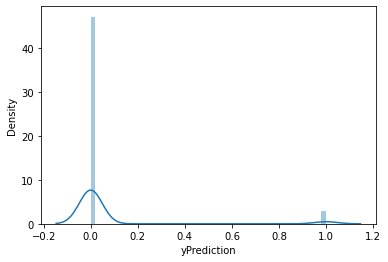

In [94]:
sns.distplot(dfFilterTest["yPrediction"])

In [96]:
yPredTest = mlp.predict(xTestScaled.astype(float))
yProbTest = mlp.predict_proba(xTestScaled.astype(float))[:,1]

falsePositiveRate,truePositiveRate,threshold = metrics.roc_curve(yTest,yProbTest,pos_label=0)
rocAucScore = metrics.roc_auc_score(yTest,yProbTest)
logLoss = log_loss(yTest,yProbTest)
print("roc auc score: %s" % rocAucScore)
print("log loss: {0}".format(logLoss))

roc auc score: 0.73766813479301
log loss: 0.3784095066062308


Text(0.5, 1.0, 'Receiver operating characteristic AUC=0.74')

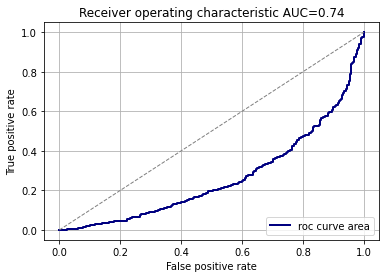

In [102]:
plt.plot(falsePositiveRate,truePositiveRate,lw=2,color='navy')
plt.plot([0,1],[0,1],color='gray',lw=1,linestyle='--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.ylim([-0.05, 1.05])
plt.xlim([-0.05, 1.05])
plt.grid()
plt.legend(["roc curve area"],loc ="lower right")
plt.title('Receiver operating characteristic AUC={0:0.2f}'.format(rocAucScore))

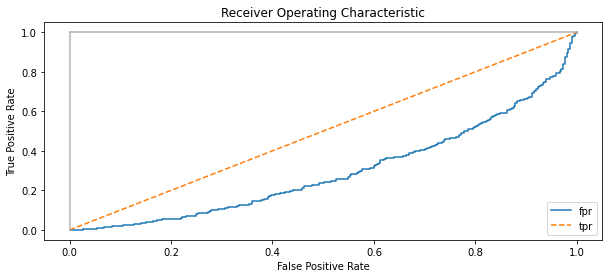

In [76]:
plt.subplots(1,figsize=(10,4))
plt.title('Receiver Operating Characteristic')
plt.plot(falsePositiveRate,truePositiveRate)
plt.plot([0,1], ls="--")
plt.plot([0,0], [1, 0], c=".7"), plt.plot([1,1], c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
# plt.savefig("image/roc_nn.jpg")